# Imports and Preliminary Variables

Import the libraries we need for analyzing and model training: Pandas, Altair, Seaborn, Vega for detect the geographical location of the counties, later used for visualization

In [ ]:
import pandas as pd
import altair as alt
import seaborn as sns
from vega_datasets import data
counties = alt.topo_feature(data.us_10m.url, 'counties')

Import the path from the data we saved on Google Drive, make sure to change this part when you run on your own machine

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Lily and Minh Path
path_2022 = '/content/drive/MyDrive/ItDS Project/Data/2022/analytic_data2022.csv'
#path_2021 = '/content/drive/MyDrive/ItDS Project/Data/2021/analytic_data2021.csv'

#Womack Path
#path_2022 = '/content/drive/MyDrive/data science/class/ItDS Project/Data/2022/analytic_data2022.csv'
#path_2021 = '/content/drive/MyDrive/data science/class/ItDS Project/Data/2021/analytic_data2021.csv'

# Q5: Do areas with higher ratios of primary care physicians and mental health providers have larger amounts of teen births?

In [ ]:
countyData5 = pd.read_csv(path_2022)
countyData5 = countyData5[['State FIPS Code','County FIPS Code','5-digit FIPS Code','State Abbreviation','Name','Ratio of population to primary care physicians.',
                         'Ratio of population to mental health providers.','Teen births raw value']]
countyData5 = countyData5.iloc[1:]
countyData5b = countyData5
countyData5.head()

<ipython-input-257-708689ab29d5>:1: DtypeWarning:

Columns (0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,26

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Ratio of population to primary care physicians.,Ratio of population to mental health providers.,Teen births raw value
1,00,000,00000,US,United States,1307.071044,354.72683964,19.300572586
2,01,000,01000,AL,Alabama,1518.954461,845.91474734,27.598889304
3,01,001,01001,AL,Autauga County,2234.76,2673.5714286,22.976945691
4,01,003,01003,AL,Baldwin County,1449.5714286,1005.6447368,23.734320007
5,01,005,01005,AL,Barbour County,2742.8888889,4098.1666667,34.700315457


In [ ]:
countyDataCorr = countyData5[['State FIPS Code','5-digit FIPS Code','Ratio of population to primary care physicians.',
                         'Ratio of population to mental health providers.','Teen births raw value']]
corr = countyDataCorr.astype('float64').corr()
corr.style.background_gradient(cmap='coolwarm')

,State FIPS Code,5-digit FIPS Code,Ratio of population to primary care physicians.,Ratio of population to mental health providers.,Teen births raw value
State FIPS Code,1.000000,0.999976,0.003350,-0.006326,-0.033341
5-digit FIPS Code,0.999976,1.000000,0.003812,-0.005642,-0.032089
Ratio of population to primary care physicians.,0.003350,0.003812,1.000000,0.295472,0.238637
Ratio of population to mental health providers.,-0.006326,-0.005642,0.295472,1.000000,0.198817
Teen births raw value,-0.033341,-0.032089,0.238637,0.198817,1.000000


In [ ]:
stateData = [x for _, x in countyData5b.groupby('State Abbreviation')]
state_corr = []


for x in range(len(stateData)):
  #print(x)
  if x == 44:
    continue

  dfIt = stateData[x]
  dfIt['Ratio of population to primary care physicians.'] = dfIt['Ratio of population to primary care physicians.'].astype(float)
  dfIt['Ratio of population to mental health providers.'] = dfIt['Ratio of population to mental health providers.'].astype(float)
  dfIt['Teen births raw value'] = dfIt['Teen births raw value'].astype(float)
  dfIt = stateData[x].iloc[1:]
  dfIt = dfIt[['State FIPS Code','Ratio of population to primary care physicians.',
                         'Ratio of population to mental health providers.','Teen births raw value']]
  
  
  z = dfIt.iloc[0]['State FIPS Code']
  
  #print(f'22 primary care for {z}: ',dfIt['Ratio of population to primary care physicians.'].corr(dfIt['Teen births raw value']))
  #print(f'22 mental health care for {z}: ',dfIt['Ratio of population to mental health providers.'].corr(dfIt['Teen births raw value']))
  curr_lst = [z,dfIt['Ratio of population to primary care physicians.'].corr(dfIt['Teen births raw value']),dfIt['Ratio of population to mental health providers.'].corr(dfIt['Teen births raw value'])]
  state_corr.append(curr_lst)

stateData = pd.DataFrame(state_corr, columns=['State', 'Ratio of population to primary care physicians/ Teen Pregnancies','Ratio of population to mental health providers/ Teen Pregnancies'])
stateData.head()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2821: RuntimeWarning:

Degrees of freedom <= 0 for slice

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning:

divide by zero encountered in true_divide



,State,Ratio of population to primary care physicians/ Teen Pregnancies,Ratio of population to mental health providers/ Teen Pregnancies
0,02,0.228442,0.340639
1,01,0.100679,0.300988
2,05,-0.043682,0.052773
3,04,0.166541,0.362707
4,06,0.508945,0.391151


In [ ]:
corr = stateData.astype('float64').corr()
corr.style.background_gradient(cmap='coolwarm')

,State,Ratio of population to primary care physicians/ Teen Pregnancies,Ratio of population to mental health providers/ Teen Pregnancies
State,1.000000,-0.009988,-0.198433
Ratio of population to primary care physicians/ Teen Pregnancies,-0.009988,1.000000,0.235729
Ratio of population to mental health providers/ Teen Pregnancies,-0.198433,0.235729,1.000000


Answer: There does not seem to be a correlation between the ratio of either primary care physicians or mental health providers to teen pregnancies when taking it at a per state level or overall on all counties.

# Predictive Modeling Q1 - Education, Unemployment and Health


The best models generated for this section relate to poor health days and some college. As they have the lowest MSE/MAE and least variance for the bucketed model. We can accurately predict the health outcomes of an area using the educational attainment. The higher an educational attainemnt in an area, the lower the negative health outcomes, vice versa is also true. However economics is a much more varied picture, very few models generated had an acceptable variance and MSE/MAE

In this section, each top line is for a health outcome and contains generated predictive models for the selected determinant factors

Package and library imports for predictive modeling

In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=cd2822eb1dd32d2df02f7bd178e20dbae92fa7e25173bfc87fc591fdf2ccc288
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import sklearn as skl
from xgboost import XGBClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Cleaning

Grab the factors and outcomes to be analyzed in this section

In [ ]:
#p1 = pd.read_csv('/content/drive/MyDrive/ItDS Project/Data/2022/analytic_data2022.csv')
p1 = pd.read_csv('/content/drive/MyDrive/data science/class/ItDS Project/Data/2022/analytic_data2022.csv')
p1 = p1[['Population raw value','County FIPS Code','5-digit FIPS Code', 'State Abbreviation', 'Name','Unemployment raw value','High school completion raw value','Some college raw value','Poor physical health days raw value', 'Poor or fair health raw value', 'Low birthweight raw value', 'Poor mental health days raw value',
                         'Premature death raw value']]
p1

<ipython-input-5-02a6245fc01c>:2: DtypeWarning: Columns (0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,2

,Population raw value,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Unemployment raw value,High school completion raw value,Some college raw value,Poor physical health days raw value,Poor or fair health raw value,Low birthweight raw value,Poor mental health days raw value,Premature death raw value
0,v051_rawvalue,countycode,fipscode,state,county,v023_rawvalue,v168_rawvalue,v069_rawvalue,v036_rawvalue,v002_rawvalue,v037_rawvalue,v042_rawvalue,v001_rawvalue
1,329484123,000,00000,US,United States,0.080528754,0.8852852128,0.6691507938,3.9073588699,0.1710516277,0.0819065527,4.5269811321,7281.9355638
2,4921532,000,01000,AL,Alabama,0.0587700638,0.8687361805,0.6157528395,4.8146328442,0.2141018928,0.1043276003,5.6183155052,10350.071456
3,56145,001,01001,AL,Autauga County,0.0488427897,0.8871368199,0.607217355,4.5100424038,0.201,0.0973815192,5.4190677155,8027.3947267
4,229287,003,01003,AL,Baldwin County,0.0560648182,0.9047138458,0.6553210756,4.168866136,0.172,0.0838573118,5.173915124,8118.3582061
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,42673,37,56037,WY,Sweetwater County,0.073512,0.925698,0.619264,3.495993,0.163,0.101337,3.93355,8419.275418
3191,23497,39,56039,WY,Teton County,0.059984,0.946856,0.760398,2.779692,0.116,0.080655,3.305173,3283.066198
3192,20215,41,56041,WY,Uinta County,0.0625,0.931032,0.577033,3.792121,0.172,0.095438,4.268578,9358.208153
3193,7760,43,56043,WY,Washakie County,0.052697,0.920036,0.62404,3.660729,0.173,0.067114,4.040619,7073.941804


In [ ]:
p1_non_overall = p1[p1['County FIPS Code'] != '000']
p1_non_overall = p1_non_overall[1:]
p1_non_overall = p1_non_overall.dropna()
p1_non_overall = p1_non_overall.reset_index(drop=True)

# Outliers Finding

In the next few code segments, we use boxplots to find the cutoffs for outliers

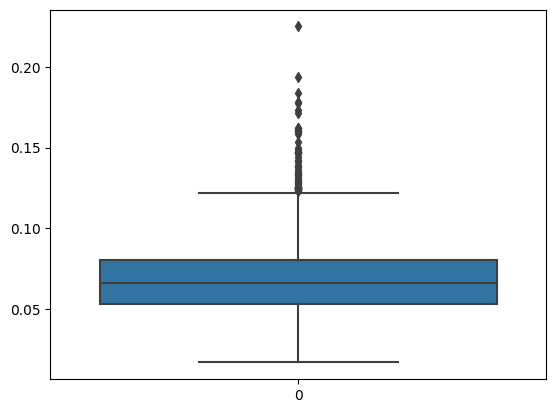

In [ ]:
a1 = sns.boxplot(p1_non_overall["Unemployment raw value"])


<Axes: >

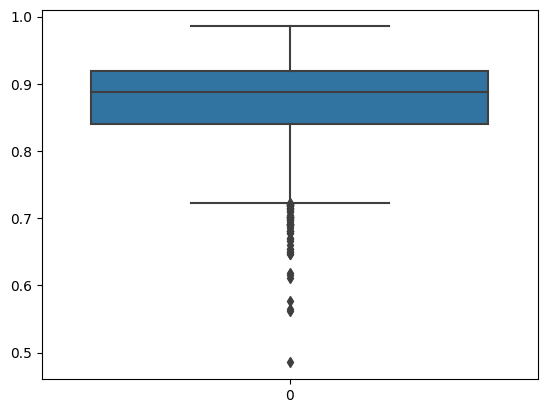

In [ ]:
sns.boxplot(p1_non_overall["High school completion raw value"])

<Axes: >

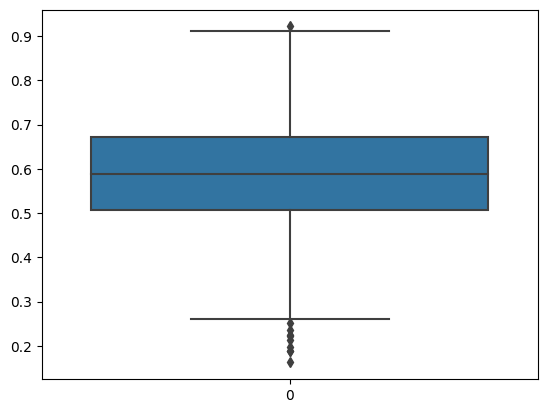

In [ ]:
sns.boxplot(p1_non_overall["Some college raw value"])

Using the numbers from the boxplots, we drop the outlier variables so as to not skew our predictive models. The drop rate typically represents 3-5 percent of the overall total of +3000 counties. Then we do a correlational matrix to see initial results

In [ ]:
p1_non_overall = p1_non_overall[['Population raw value','Unemployment raw value','High school completion raw value','Some college raw value','Poor physical health days raw value', 'Poor or fair health raw value', 'Low birthweight raw value', 'Poor mental health days raw value',
                         'Premature death raw value']]
p1_Float = p1_non_overall.astype(float)
p1_Float = p1_Float[(p1_Float["Unemployment raw value"] <= 0.14)]
p1_Float = p1_Float[p1_Float["High school completion raw value"] >= 0.71]
p1_Float = p1_Float[p1_Float["Some college raw value"] >= 0.25]
check = p1_Float.corr()
check.style.background_gradient(cmap='coolwarm')

,Population raw value,Unemployment raw value,High school completion raw value,Some college raw value,Poor physical health days raw value,Poor or fair health raw value,Low birthweight raw value,Poor mental health days raw value,Premature death raw value
Population raw value,1.000000,0.111822,0.035466,0.130626,-0.105970,-0.080974,-0.000433,-0.114802,-0.097304
Unemployment raw value,0.111822,1.000000,-0.190520,-0.185418,0.314964,0.295205,0.290081,0.326949,0.260990
High school completion raw value,0.035466,-0.190520,1.000000,0.761292,-0.722009,-0.859674,-0.444488,-0.558874,-0.552932
Some college raw value,0.130626,-0.185418,0.761292,1.000000,-0.738452,-0.774486,-0.345840,-0.635051,-0.551713
Poor physical health days raw value,-0.105970,0.314964,-0.722009,-0.738452,1.000000,0.911047,0.499633,0.923093,0.725626
Poor or fair health raw value,-0.080974,0.295205,-0.859674,-0.774486,0.911047,1.000000,0.571172,0.764540,0.735715
Low birthweight raw value,-0.000433,0.290081,-0.444488,-0.345840,0.499633,0.571172,1.000000,0.477820,0.553405
Poor mental health days raw value,-0.114802,0.326949,-0.558874,-0.635051,0.923093,0.764540,0.477820,1.000000,0.644452
Premature death raw value,-0.097304,0.260990,-0.552932,-0.551713,0.725626,0.735715,0.553405,0.644452,1.000000


In [ ]:
len((p1_Float.index))

2998

# Poor physical health days raw value

Multi Variable

A test/train split of 50/50 was used for all of our models. Preventing overfit and ensuring accurate models. Model will go ahead and be trained then analyzed further down. 

In the binned models, higher variance show a less reliable model overall, either from the vertical bars from data points showing being larger or variance from the linear regression lines

In [ ]:
X =p1_Float[['High school completion raw value','Some college raw value', 'Unemployment raw value']]
y = p1_Float['Poor physical health days raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm_PPHD = LinearRegression()
lm_PPHD.fit(X_train,y_train)
print(lm_PPHD.intercept_)

10.197812541319038


In [ ]:
coeff_df = pd.DataFrame(lm_PPHD.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
High school completion raw value,-5.230647
Some college raw value,-2.789896
Unemployment raw value,5.668497


Calculate and print out error metrics for the model generated above

In [ ]:
predictions_PPHD = lm_PPHD.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions_PPHD))
print('MSE:', metrics.mean_squared_error(y_test, predictions_PPHD))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_PPHD)))
print('R2: ', metrics.r2_score(y_test, predictions_PPHD))

MAE: 0.3472289729122597
MSE: 0.1968800288665959
RMSE: 0.44371165058695033
R2:  0.6285807621043353


Model using all of the determinants and the resulting predicted y values

[]

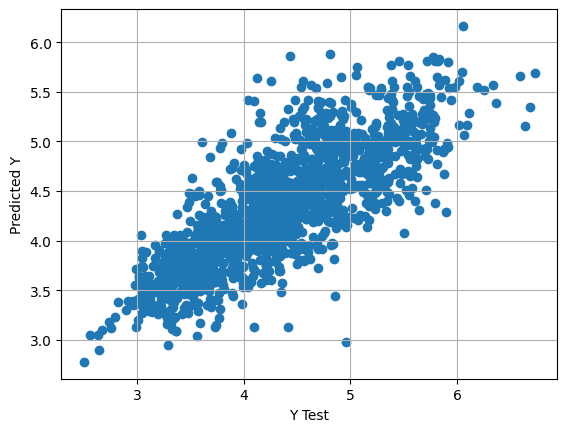

In [ ]:
plt.scatter(y_test,predictions_PPHD)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.grid()
plt.plot()

Singular Variable

Train a singular variable model


In [ ]:
X =p1_Float[['High school completion raw value']]
y = p1_Float['Poor physical health days raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm_PPHD = LinearRegression()
lm_PPHD.fit(X_train,y_train)
print(lm_PPHD.intercept_)

13.338099624153338


In [ ]:
coeff_df = pd.DataFrame(lm_PPHD.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
High school completion raw value,-10.24163


Calculate and print out error metrics for the model generated above

In [ ]:
predictions_PPHD = lm_PPHD.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions_PPHD))
print('MSE:', metrics.mean_squared_error(y_test, predictions_PPHD))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_PPHD)))
print('R2: ', metrics.r2_score(y_test, predictions_PPHD))

MAE: 0.4072023693449403
MSE: 0.26059392103945184
RMSE: 0.5104840066441375
R2:  0.5083828659010409


A model for the variables in generated below, values are binned for viewing convenience

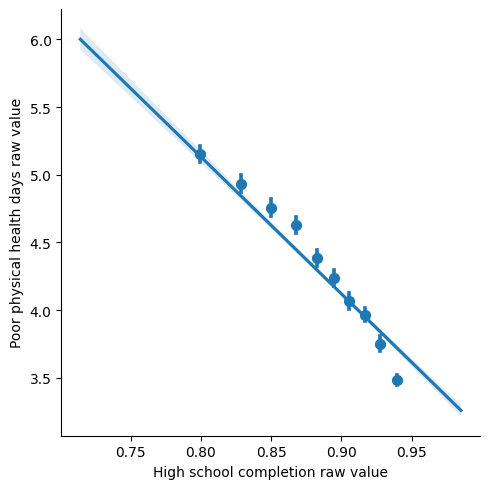

In [ ]:
sns.lmplot(x= 'High school completion raw value', y="Poor physical health days raw value", data=p1_Float,x_bins=10, x_estimator=np.mean)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(p1_Float[['High school completion raw value']], p1_Float['Poor physical health days raw value'], test_size=.2)
# create model instance
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='reg:squarederror')
# fit model
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
bst.fit(X_train, y_train)
# make predictions
preds = bst.predict(X_test)


Train a singular variable model


In [ ]:
X =p1_Float[['Some college raw value']]
y = p1_Float['Poor physical health days raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm_PPHD = LinearRegression()
lm_PPHD.fit(X_train,y_train)
print(lm_PPHD.intercept_)

7.231714826876937


In [ ]:
coeff_df = pd.DataFrame(lm_PPHD.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Some college raw value,-4.910521


Calculate and print out error metrics for the model generated above

In [ ]:
predictions_PPHD = lm_PPHD.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions_PPHD))
print('MSE:', metrics.mean_squared_error(y_test, predictions_PPHD))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_PPHD)))
print('R2: ', metrics.r2_score(y_test, predictions_PPHD))

MAE: 0.3812404104030023
MSE: 0.24177138176432433
RMSE: 0.49170253381930457
R2:  0.5438920703291149


A model for the variables in generated below, values are binned for viewing convenience

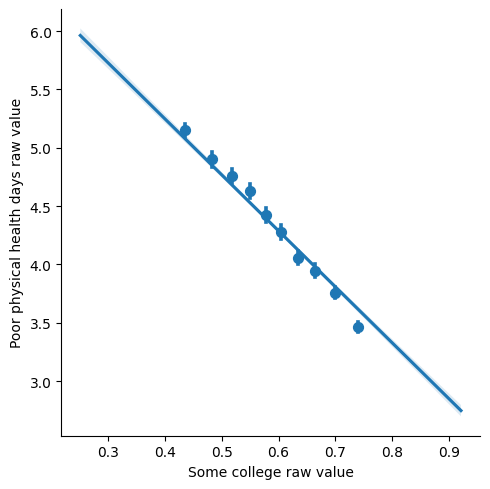

In [ ]:
sns.lmplot(x= 'Some college raw value', y="Poor physical health days raw value", data=p1_Float,x_bins=10, x_estimator=np.mean)

In [ ]:
X =p1_Float[['Unemployment raw value']]
y = p1_Float['Poor physical health days raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm_PPHD = LinearRegression()
lm_PPHD.fit(X_train,y_train)
print(lm_PPHD.intercept_)

3.491197174789937


Train a singular variable model


In [ ]:
coeff_df = pd.DataFrame(lm_PPHD.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Unemployment raw value,12.570036


Calculate and print out error metrics for the model generated above

In [ ]:
predictions_PPHD = lm_PPHD.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions_PPHD))
print('MSE:', metrics.mean_squared_error(y_test, predictions_PPHD))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_PPHD)))
print('R2: ', metrics.r2_score(y_test, predictions_PPHD))

MAE: 0.5697257623461081
MSE: 0.48906679950696974
RMSE: 0.6993331105467335
R2:  0.07736290471577434


A model for the variables in generated below, values are binned for viewing convenience

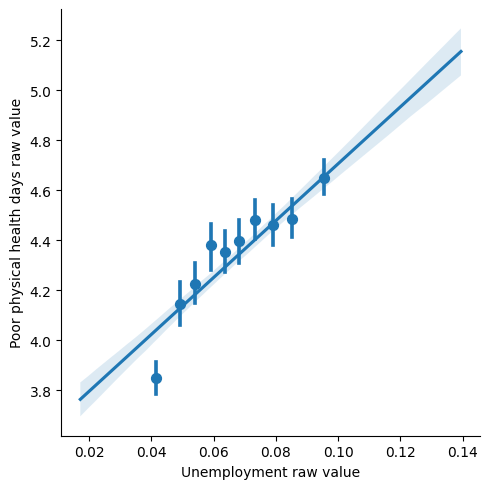

In [ ]:
sns.lmplot(x= 'Unemployment raw value', y="Poor physical health days raw value", data=p1_Float,x_bins=10, x_estimator=np.mean)

# Poor or fair health raw value

Multi Variable

A test/train split of 50/50 was used for all of our models. Preventing overfit and ensuring accurate models. Model will go ahead and be trained then analyzed further down.

In the binned models, higher variance show a less reliable model overall, either from the vertical bars from data points showing being larger or variance from the linear regression lines

In [ ]:
X =p1_Float[['High school completion raw value','Some college raw value', 'Unemployment raw value']]
y = p1_Float['Poor or fair health raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm_PoFH = LinearRegression()
lm_PoFH.fit(X_train,y_train)
print(lm_PoFH.intercept_)

0.7615054333688296


In [ ]:
coeff_df = pd.DataFrame(lm_PoFH.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
High school completion raw value,-0.584661
Some college raw value,-0.108619
Unemployment raw value,0.315518


Calculate and print out error metrics for the model generated above

In [ ]:
predictions_PoFH = lm_PoFH.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions_PoFH))
print('MSE:', metrics.mean_squared_error(y_test, predictions_PoFH))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_PoFH)))
print('R2: ', metrics.r2_score(y_test, predictions_PoFH))

MAE: 0.01703551000959717
MSE: 0.0004669891882570442
RMSE: 0.021609932629627612
R2:  0.7813958361786506


Model using all of the determinants and the resulting predicted y values

[]

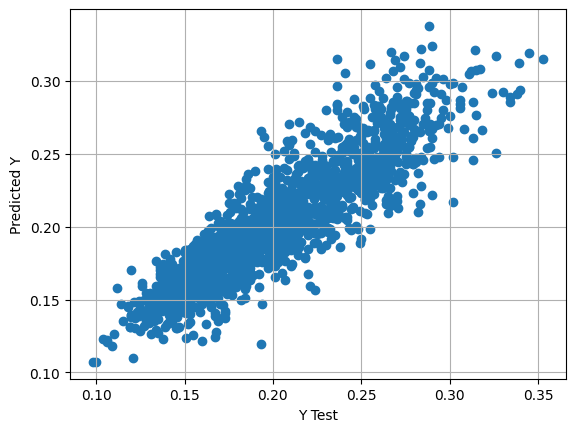

In [ ]:
plt.scatter(y_test,predictions_PoFH)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.grid()
plt.plot()

Train a singular variable model


In [ ]:
X =p1_Float[['High school completion raw value']]
y = p1_Float['Poor or fair health raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

0.898045727475629


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
High school completion raw value,-0.788748


Calculate and print out error metrics for the model generated above

In [ ]:
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE: 0.018829865381260996
MSE: 0.0005794261865543519
RMSE: 0.024071273056370572
R2:  0.7287625062998518


A model for the variables in generated below, values are binned for viewing convenience

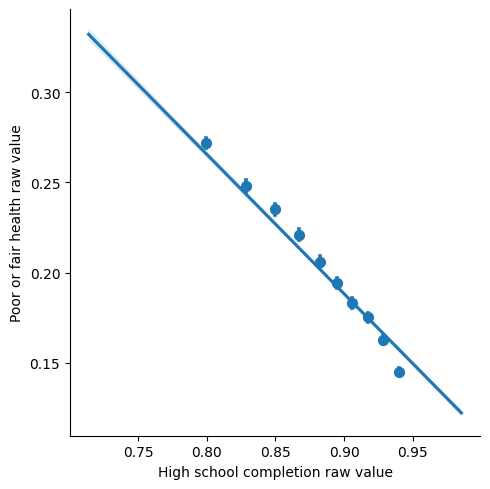

In [ ]:
sns.lmplot(x= 'High school completion raw value', y="Poor or fair health raw value", data=p1_Float,x_bins=10, x_estimator=np.mean)

Train a singular variable model


In [ ]:
X =p1_Float[['Some college raw value']]
y = p1_Float['Poor or fair health raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

0.4007665056692022


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Some college raw value,-0.332388


Calculate and print out error metrics for the model generated above

In [ ]:
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE: 0.022661137835001958
MSE: 0.000837103958707901
RMSE: 0.028932748896499636
R2:  0.608139940866989


A model for the variables in generated below, values are binned for viewing convenience

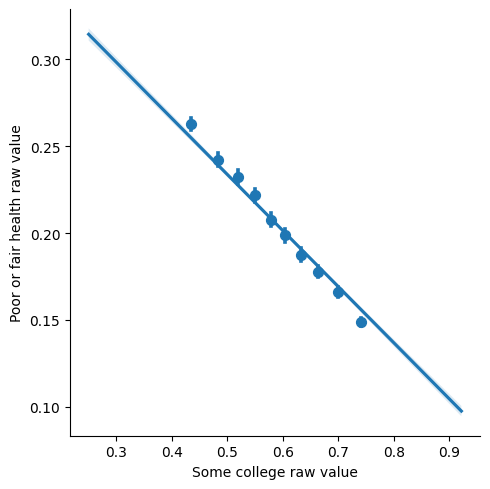

In [ ]:
sns.lmplot(x= 'Some college raw value', y="Poor or fair health raw value", data=p1_Float,x_bins=10, x_estimator=np.mean)

Train a singular variable model


In [ ]:
X =p1_Float[['Unemployment raw value']]
y = p1_Float['Poor or fair health raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

0.14896278946065228


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Unemployment raw value,0.830201


Calculate and print out error metrics for the model generated above

In [ ]:
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE: 0.037530694010255786
MSE: 0.002048062819516596
RMSE: 0.04525552805477576
R2:  0.04127317853965895


A model for the variables in generated below, values are binned for viewing convenience

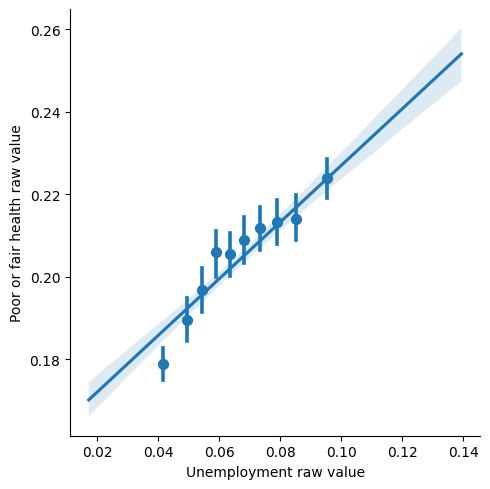

In [ ]:
sns.lmplot(x= 'Unemployment raw value', y="Poor or fair health raw value", data=p1_Float,x_bins=10, x_estimator=np.mean)

# Low birthweight raw value

Multi Variable

A test/train split of 50/50 was used for all of our models. Preventing overfit and ensuring accurate models. Model will go ahead and be trained then analyzed further down.

In the binned models, higher variance show a less reliable model overall, either from the vertical bars from data points showing being larger or variance from the linear regression lines

In [ ]:
X =p1_Float[['High school completion raw value','Some college raw value', 'Unemployment raw value']]
y = p1_Float['Low birthweight raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm_LB = LinearRegression()
lm_LB.fit(X_train,y_train)
print(lm_LB.intercept_)

0.20943935908900696


In [ ]:
coeff_df = pd.DataFrame(lm_LB.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
High school completion raw value,-0.163758
Some college raw value,0.003479
Unemployment raw value,0.213135


Calculate and print out error metrics for the model generated above

In [ ]:
predictions_LB = lm_LB.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions_LB))
print('MSE:', metrics.mean_squared_error(y_test, predictions_LB))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_LB)))
print('R2: ', metrics.r2_score(y_test, predictions_LB))

MAE: 0.013305567216718078
MSE: 0.00030151908352651913
RMSE: 0.017364304867357034
R2:  0.21885659730269402


Model using all of the determinants and the resulting predicted y values

[]

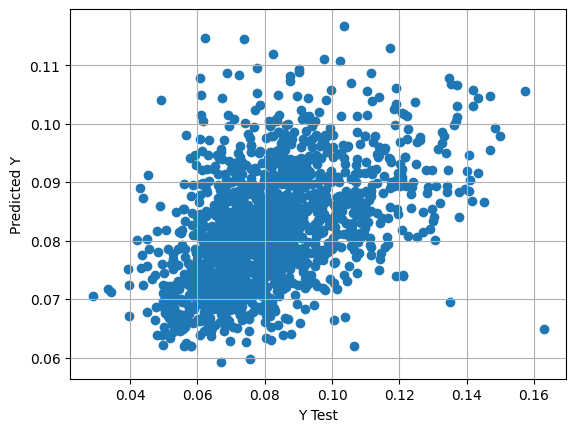

In [ ]:
plt.scatter(y_test,predictions_LB)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.grid()
plt.plot()

Train a singular variable model


In [ ]:
X =p1_Float[['High school completion raw value']]
y = p1_Float['Low birthweight raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

0.23868330230092066


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
High school completion raw value,-0.178398


Calculate and print out error metrics for the model generated above

In [ ]:
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE: 0.013542873683738176
MSE: 0.00031901477439218997
RMSE: 0.017860984698279934
R2:  0.17353063207519537


A model for the variables in generated below, values are binned for viewing convenience

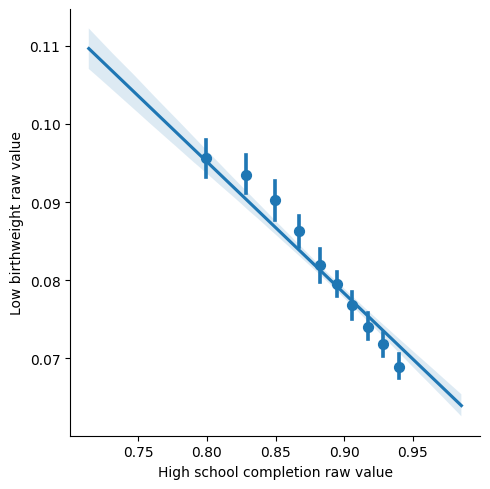

In [ ]:
sns.lmplot(x= 'High school completion raw value', y="Low birthweight raw value", data=p1_Float,x_bins=10, x_estimator=np.mean)

Train a singular variable model


In [ ]:
X =p1_Float[['Some college raw value']]
y = p1_Float['Low birthweight raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

0.11985287554169988


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Some college raw value,-0.0644


Calculate and print out error metrics for the model generated above

In [ ]:
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE: 0.014236220252869103
MSE: 0.000343218702588462
RMSE: 0.018526162651462987
R2:  0.11082568282705152


A model for the variables in generated below, values are binned for viewing convenience

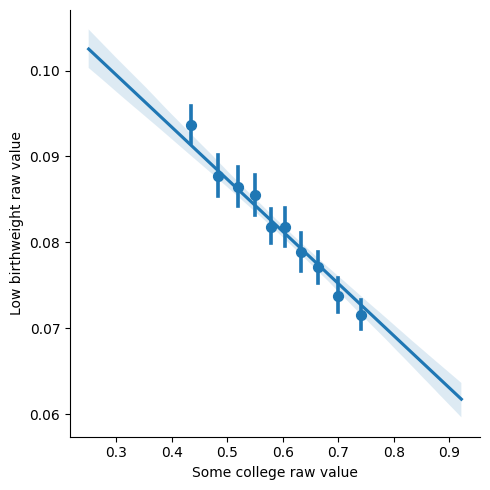

In [ ]:
sns.lmplot(x= 'Some college raw value', y="Low birthweight raw value", data=p1_Float,x_bins=10, x_estimator=np.mean)

Train a singular variable model


In [ ]:
X =p1_Float[['Unemployment raw value']]
y = p1_Float['Low birthweight raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

0.060742369824042616


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Unemployment raw value,0.314462


Calculate and print out error metrics for the model generated above

In [ ]:
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE: 0.014782613519334051
MSE: 0.0003607532699216936
RMSE: 0.01899350599340979
R2:  0.06539900060413051


A model for the variables in generated below, values are binned for viewing convenience

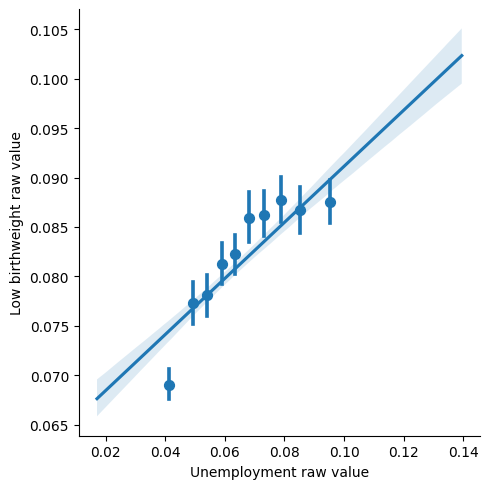

In [ ]:
sns.lmplot(x= 'Unemployment raw value', y="Low birthweight raw value", data=p1_Float,x_bins=10, x_estimator=np.mean)

# Poor mental health days raw value

Multi Variable

A test/train split of 50/50 was used for all of our models. Preventing overfit and ensuring accurate models. Model will go ahead and be trained then analyzed further down.

In the binned models, higher variance show a less reliable model overall, either from the vertical bars from data points showing being larger or variance from the linear regression lines

In [ ]:
X =p1_Float[['High school completion raw value','Some college raw value', 'Unemployment raw value']]
y = p1_Float['Poor mental health days raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm_PMHD = LinearRegression()
lm_PMHD.fit(X_train,y_train)
print(lm_PMHD.intercept_)

8.039856182993187


In [ ]:
coeff_df = pd.DataFrame(lm_PMHD.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
High school completion raw value,-2.149943
Some college raw value,-2.864373
Unemployment raw value,6.504780


Calculate and print out error metrics for the model generated above

In [ ]:
predictions_PMHD = lm_PMHD.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions_PMHD))
print('MSE:', metrics.mean_squared_error(y_test, predictions_PMHD))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_PMHD)))
print('R2: ', metrics.r2_score(y_test, predictions_PMHD))

MAE: 0.39758018401182643
MSE: 0.24927297596714013
RMSE: 0.49927244663323866
R2:  0.4603370096866265


Model using all of the determinants and the resulting predicted y values

[]

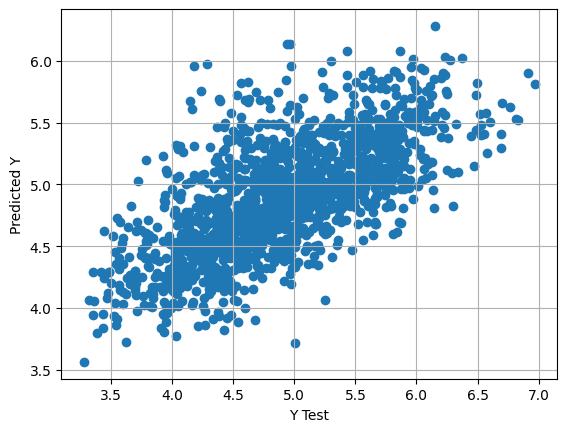

In [ ]:
plt.scatter(y_test,predictions_PMHD)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.grid()
plt.plot()

Train a singular variable model


In [ ]:
X =p1_Float[['High school completion raw value']]
y = p1_Float['Poor mental health days raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

11.367121365248785


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
High school completion raw value,-7.359673


Calculate and print out error metrics for the model generated above

In [ ]:
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE: 0.4520053890269248
MSE: 0.32242260204031786
RMSE: 0.5678226853871884
R2:  0.30197188489203153


A model for the variables in generated below, values are binned for viewing convenience

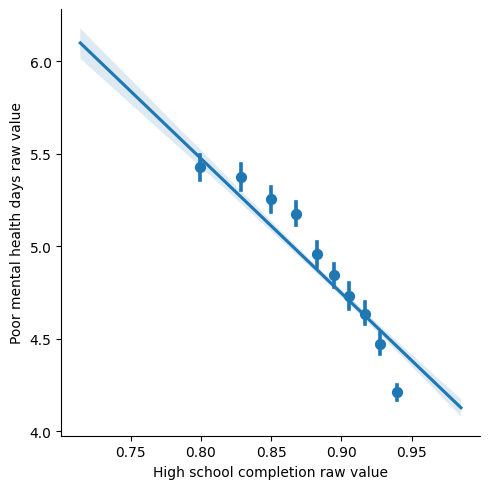

In [ ]:
sns.lmplot(x= 'High school completion raw value', y="Poor mental health days raw value", data=p1_Float,x_bins=10, x_estimator=np.mean)

Train a singular variable model


In [ ]:
X =p1_Float[['Some college raw value']]
y = p1_Float['Poor mental health days raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

7.203963605561558


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Some college raw value,-3.910123


Calculate and print out error metrics for the model generated above

In [ ]:
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE: 0.4151140303306188
MSE: 0.27670645203238453
RMSE: 0.5260289460023893
R2:  0.40094496499899157


A model for the variables in generated below, values are binned for viewing convenience

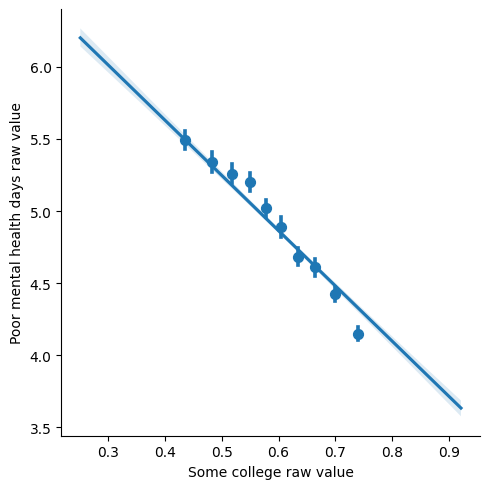

In [ ]:
sns.lmplot(x= 'Some college raw value', y="Poor mental health days raw value", data=p1_Float,x_bins=10, x_estimator=np.mean)

Train a singular variable model


In [ ]:
X =p1_Float[['Unemployment raw value']]
y = p1_Float['Poor mental health days raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

4.124518710742993


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Unemployment raw value,11.511497


Calculate and print out error metrics for the model generated above

In [ ]:
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE: 0.5251583355179061
MSE: 0.41702302329477053
RMSE: 0.645773198030679
R2:  0.09716690745311085


A model for the variables in generated below, values are binned for viewing convenience

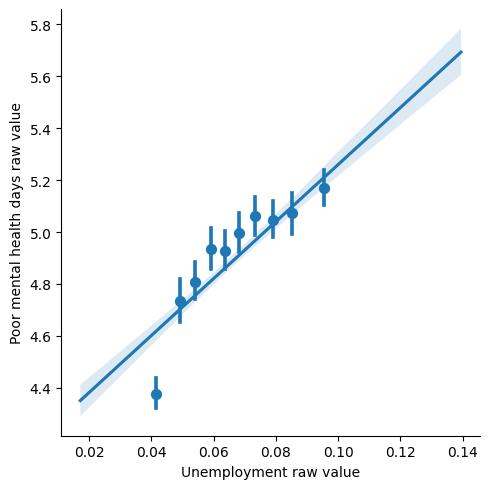

In [ ]:
sns.lmplot(x= 'Unemployment raw value', y="Poor mental health days raw value", data=p1_Float,x_bins=10, x_estimator=np.mean)

# Premature death raw value

Multi Variable

A test/train split of 50/50 was used for all of our models. Preventing overfit and ensuring accurate models. Model will go ahead and be trained then analyzed further down.

In the binned models, higher variance show a less reliable model overall, either from the vertical bars from data points showing being larger or variance from the linear regression lines

In [ ]:
X =p1_Float[['High school completion raw value','Some college raw value', 'Unemployment raw value']]
y = p1_Float['Premature death raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm_PD = LinearRegression()
lm_PD.fit(X_train,y_train)
print(lm_PD.intercept_)

27268.138568427086


In [ ]:
coeff_df = pd.DataFrame(lm_PD.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
High school completion raw value,-17100.615853
Some college raw value,-7866.996545
Unemployment raw value,19766.750687


Calculate and print out error metrics for the model generated above

In [ ]:
predictions_PD = lm_PD.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions_PD))
print('MSE:', metrics.mean_squared_error(y_test, predictions_PD))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_PD)))
print('R2: ', metrics.r2_score(y_test, predictions_PD))

MAE: 1604.4663970599963
MSE: 5104120.886765074
RMSE: 2259.230153562287
R2:  0.34532247139907857


Model using all of the determinants and the resulting predicted y values

[]

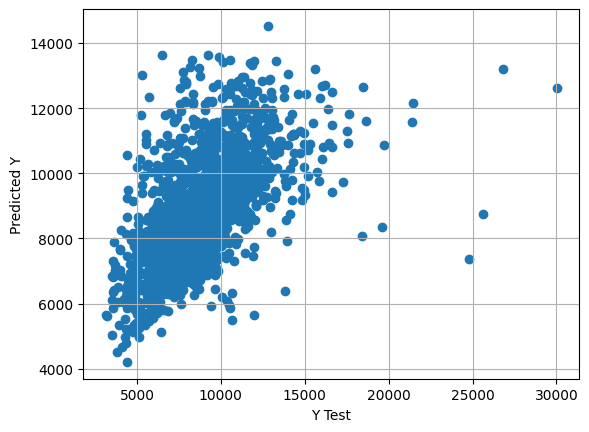

In [ ]:
plt.scatter(y_test,predictions_PD)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.grid()
plt.plot()

Train a singular variable model


In [ ]:
X =p1_Float[['High school completion raw value']]
y = p1_Float['Premature death raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

36692.793045550745


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
High school completion raw value,-31589.498898


Calculate and print out error metrics for the model generated above

In [ ]:
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE: 1701.5767319623515
MSE: 5612402.260640915
RMSE: 2369.0509198075324
R2:  0.28012801361384865


A model for the variables in generated below, values are binned for viewing convenience

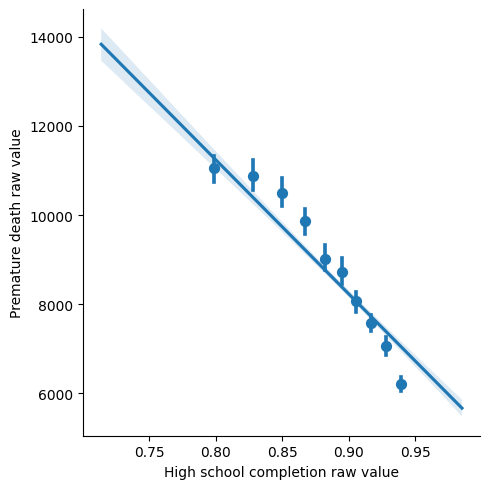

In [ ]:
sns.lmplot(x= 'High school completion raw value', y="Premature death raw value", data=p1_Float,x_bins=10, x_estimator=np.mean)

Train a singular variable model


In [ ]:
X =p1_Float[['Some college raw value']]
y = p1_Float['Premature death raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

17684.38368589752


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Some college raw value,-14851.473268


Calculate and print out error metrics for the model generated above

In [ ]:
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE: 1691.7511238423447
MSE: 5597235.490179183
RMSE: 2365.847731824511
R2:  0.28207337188866743


A model for the variables in generated below, values are binned for viewing convenience

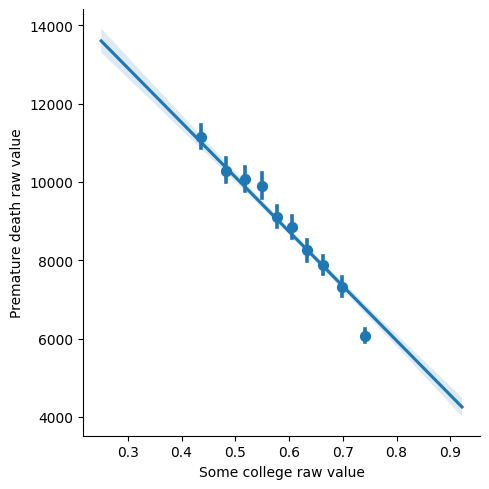

In [ ]:
sns.lmplot(x= 'Some college raw value', y="Premature death raw value", data=p1_Float,x_bins=10, x_estimator=np.mean)

Train a singular variable model


In [ ]:
X =p1_Float[['Unemployment raw value']]
y = p1_Float['Premature death raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

6188.102693812396


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Unemployment raw value,40745.737457


Calculate and print out error metrics for the model generated above

In [ ]:
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE: 2084.1829990576016
MSE: 7392633.044875236
RMSE: 2718.9396912905654
R2:  0.051787596915671696


A model for the variables in generated below, values are binned for viewing convenience

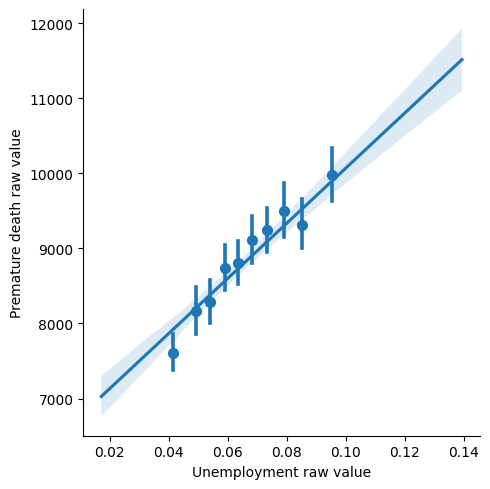

In [ ]:
sns.lmplot(x= 'Unemployment raw value', y="Premature death raw value", data=p1_Float,x_bins=10, x_estimator=np.mean)

# Predictive Modeling Q2 - Environment and Health Outcomes

Overall, we were unable to generate a reliable model for these determinantsand health outcomes. The data was heavily clustered making certain types of prediction models unstable and unreliable. The most stable model was air pollution rates and poor or fair health days, which was still too unreliable to be of use. Our conclusion is that we cannot generate a reliable predictive model for determinant environmental factors and health outcomes

Speculated reasons: Underreporting of pollution in general in the United States, Ideological bias in the data when collected, underreporting of pollution in socioeconomically disadvantaged areas, etc

In this section, each top line is for a health outcome and contains generated predictive models for the selected determinant factors

In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached sklearn-0.0.post1.tar.gz (3.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import sklearn as skl
import xgboost as xg

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Cleaning

Grab the factors and outcomes to be analyzed in this section

In [ ]:
p2 = pd.read_csv('/content/drive/MyDrive/ItDS Project/Data/2022/analytic_data2022.csv')
#p2 = pd.read_csv('/content/drive/MyDrive/data science/class/ItDS Project/Data/2022/analytic_data2022.csv')
p2 = p2[['Population raw value','County FIPS Code','5-digit FIPS Code', 'State Abbreviation', 'Name','Air pollution - particulate matter raw value',
                       'Drinking water violations raw value','Severe housing problems raw value','Driving alone to work raw value','Long commute - driving alone raw value',
                       'Poor physical health days raw value', 'Poor or fair health raw value', 'Low birthweight raw value', 'Poor mental health days raw value',
                       'Premature death raw value']]
p2

<ipython-input-3-88b6de9ad1d6>:1: DtypeWarning: Columns (0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,2

,Population raw value,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Air pollution - particulate matter raw value,Drinking water violations raw value,Severe housing problems raw value,Driving alone to work raw value,Long commute - driving alone raw value,Poor physical health days raw value,Poor or fair health raw value,Low birthweight raw value,Poor mental health days raw value,Premature death raw value
0,v051_rawvalue,countycode,fipscode,state,county,v125_rawvalue,v124_rawvalue,v136_rawvalue,v067_rawvalue,v137_rawvalue,v036_rawvalue,v002_rawvalue,v037_rawvalue,v042_rawvalue,v001_rawvalue
1,329484123,000,00000,US,United States,7.5,0.4045454545,0.1731390074,0.7492091889,0.366,3.9073588699,0.1710516277,0.0819065527,4.5269811321,7281.9355638
2,4921532,000,01000,AL,Alabama,9,0.1343283582,0.1368591656,0.848731025,0.352,4.8146328442,0.2141018928,0.1043276003,5.6183155052,10350.071456
3,56145,001,01001,AL,Autauga County,9.5,0,0.1472886574,0.8670888613,0.405,4.5100424038,0.201,0.0973815192,5.4190677155,8027.3947267
4,229287,003,01003,AL,Baldwin County,7.2,0,0.1242050369,0.8299656018,0.379,4.168866136,0.172,0.0838573118,5.173915124,8118.3582061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,42673,37,56037,WY,Sweetwater County,5.4,0.0,0.100189,0.756772,0.188,3.495993,0.163,0.101337,3.93355,8419.275418
3191,23497,39,56039,WY,Teton County,5.2,1.0,0.182314,0.662721,0.156,2.779692,0.116,0.080655,3.305173,3283.066198
3192,20215,41,56041,WY,Uinta County,6.9,1.0,0.105365,0.793139,0.179,3.792121,0.172,0.095438,4.268578,9358.208153
3193,7760,43,56043,WY,Washakie County,5.2,0.0,0.084795,0.838251,0.076,3.660729,0.173,0.067114,4.040619,7073.941804


In [ ]:
p2_non_overall = p2[p2['County FIPS Code'] != '000']
p2_non_overall = p2_non_overall[1:]
p2_non_overall = p2_non_overall.dropna()
p2_non_overall = p2_non_overall.reset_index(drop=True)

# Outliers Finding

In the next few code segments, we use boxplots to find the cutoffs for outliers

<Axes: >

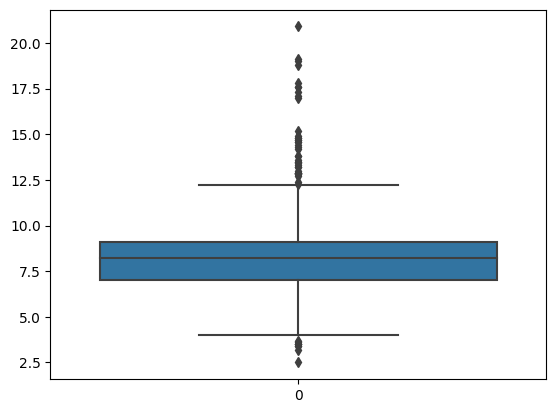

In [ ]:
sns.boxplot(p2_non_overall["Air pollution - particulate matter raw value"])


<Axes: >

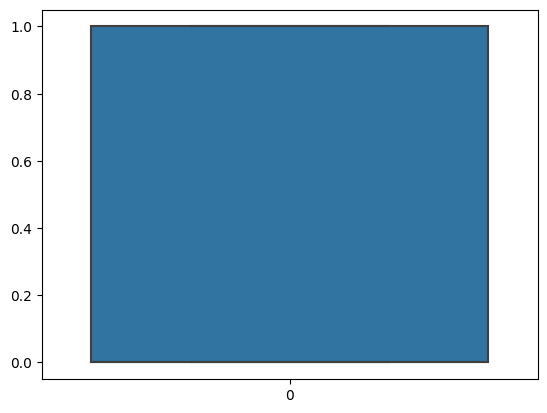

In [ ]:
sns.boxplot(p2_non_overall["Drinking water violations raw value"])


<Axes: >

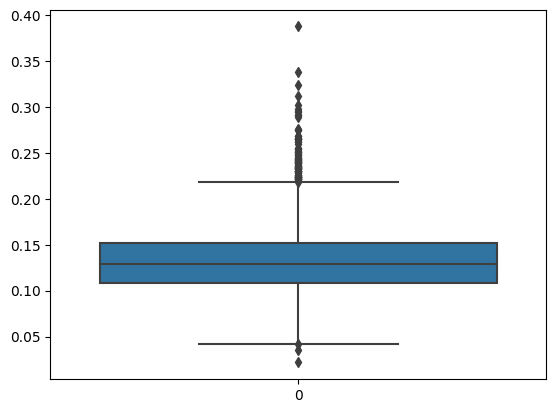

In [ ]:
sns.boxplot(p2_non_overall["Severe housing problems raw value"])


<Axes: >

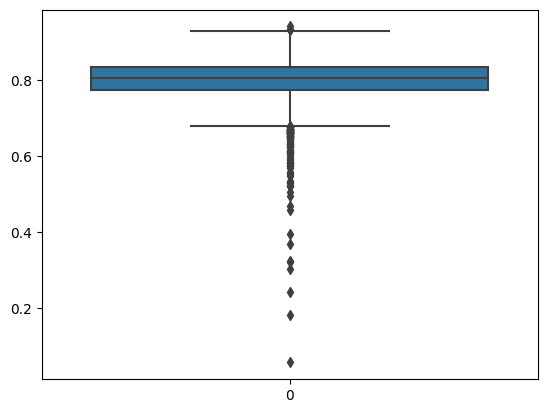

In [ ]:
sns.boxplot(p2_non_overall["Driving alone to work raw value"])


<Axes: >

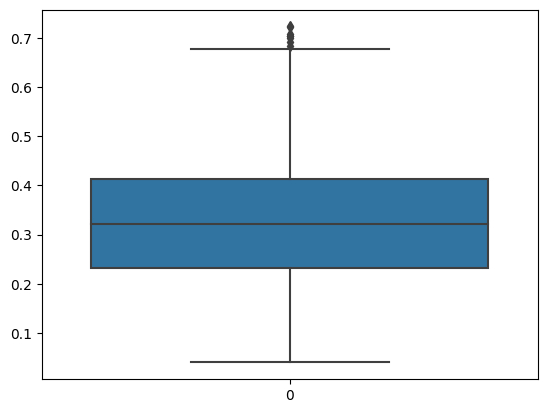

In [ ]:
sns.boxplot(p2_non_overall["Long commute - driving alone raw value"])


Using the numbers from the boxplots, we drop the outlier variables so as to not skew our predictive models. The drop rate typically represents 3-5 percent of the overall total of +3000 counties. Then we do a correlational matrix to see initial results

In [ ]:
p2_non_overall = p2_non_overall[['Air pollution - particulate matter raw value','Drinking water violations raw value','Severe housing problems raw value','Driving alone to work raw value','Long commute - driving alone raw value',
                       'Poor physical health days raw value', 'Poor or fair health raw value', 'Low birthweight raw value', 'Poor mental health days raw value',
                       'Premature death raw value']]
p2_Float = p2_non_overall.astype(float)
p2_Float = p2_Float[(p2_Float["Air pollution - particulate matter raw value"] <= 12.6) & (p2_Float["Air pollution - particulate matter raw value"] >= 3.5)]
p2_Float = p2_Float[(p2_Float["Severe housing problems raw value"] <= .23) & (p2_Float["Severe housing problems raw value"] >= 0.03)]
p2_Float = p2_Float[(p2_Float["Driving alone to work raw value"] >= .62)]
p2_Float = p2_Float[p2_Float["Long commute - driving alone raw value"] <= 0.685]
check = p2_Float.corr()
check.style.background_gradient(cmap='coolwarm')

,Air pollution - particulate matter raw value,Drinking water violations raw value,Severe housing problems raw value,Driving alone to work raw value,Long commute - driving alone raw value,Poor physical health days raw value,Poor or fair health raw value,Low birthweight raw value,Poor mental health days raw value,Premature death raw value
Air pollution - particulate matter raw value,1.000000,0.048907,0.070939,0.335250,0.258308,0.245364,0.273462,0.173684,0.301552,0.145063
Drinking water violations raw value,0.048907,1.000000,0.104361,-0.038715,-0.025142,-0.016425,0.005151,-0.010997,-0.031564,-0.033669
Severe housing problems raw value,0.070939,0.104361,1.000000,-0.179943,0.007359,0.216919,0.277376,0.311314,0.110640,0.169861
Driving alone to work raw value,0.335250,-0.038715,-0.179943,1.000000,0.148009,0.310367,0.319857,0.278097,0.387585,0.301221
Long commute - driving alone raw value,0.258308,-0.025142,0.007359,0.148009,1.000000,0.196218,0.139878,0.175169,0.284628,0.116295
Poor physical health days raw value,0.245364,-0.016425,0.216919,0.310367,0.196218,1.000000,0.902876,0.517682,0.920663,0.723821
Poor or fair health raw value,0.273462,0.005151,0.277376,0.319857,0.139878,0.902876,1.000000,0.580540,0.741314,0.723454
Low birthweight raw value,0.173684,-0.010997,0.311314,0.278097,0.175169,0.517682,0.580540,1.000000,0.488325,0.583759
Poor mental health days raw value,0.301552,-0.031564,0.110640,0.387585,0.284628,0.920663,0.741314,0.488325,1.000000,0.653763
Premature death raw value,0.145063,-0.033669,0.169861,0.301221,0.116295,0.723821,0.723454,0.583759,0.653763,1.000000


In [ ]:
len(p2_Float.index)

2883

# Poor physical health days raw value

A test/train split of 50/50 was used for all of our models. Preventing overfit and ensuring accurate models. Model will go ahead and be trained then analyzed further down.

In [ ]:
X =p2_Float[['Air pollution - particulate matter raw value','Drinking water violations raw value','Severe housing problems raw value','Driving alone to work raw value','Long commute - driving alone raw value']]
y = p2_Float['Poor physical health days raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm_PPHD = LinearRegression()
lm_PPHD.fit(X_train,y_train)
print(lm_PPHD.intercept_)

-0.5962173718767412


In [ ]:
coeff_df = pd.DataFrame(lm_PPHD.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Air pollution - particulate matter raw value,0.038130
Drinking water violations raw value,-0.107605
Severe housing problems raw value,6.424138
Driving alone to work raw value,4.423649
Long commute - driving alone raw value,0.913747


Calculate and print out error metrics for the model generated above

In [ ]:
predictions_PPHD = lm_PPHD.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions_PPHD))
print('MSE:', metrics.mean_squared_error(y_test, predictions_PPHD))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_PPHD)))
print('R2: ', metrics.r2_score(y_test, predictions_PPHD))

MAE: 0.5319365502870962
MSE: 0.4389940807654101
RMSE: 0.6625662840542145
R2:  0.2069622383906352


Model using all of the determinants and the resulting predicted y values

[]

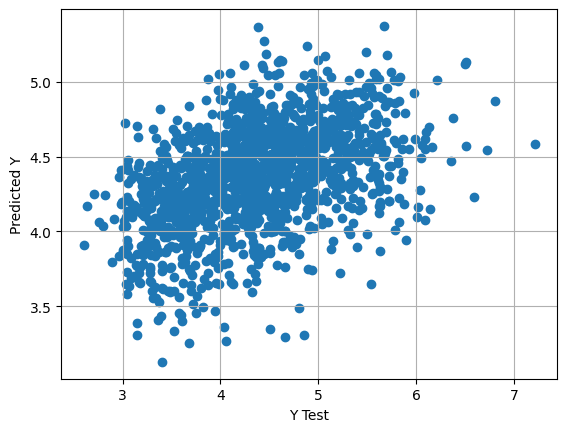

In [ ]:
plt.scatter(y_test,predictions_PPHD)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.grid()
plt.plot()

In [ ]:
X =p2_Float[['Air pollution - particulate matter raw value']]
y = p2_Float['Poor physical health days raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

3.454910695924828


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Air pollution - particulate matter raw value,0.112806


Calculate and print out error metrics for the model generated above

In [ ]:
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE: 0.5754328805969289
MSE: 0.5132209776655842
RMSE: 0.7163944288348313
R2:  0.07287220221910118


A model for the variables in generated below, values are binned for viewing convenience

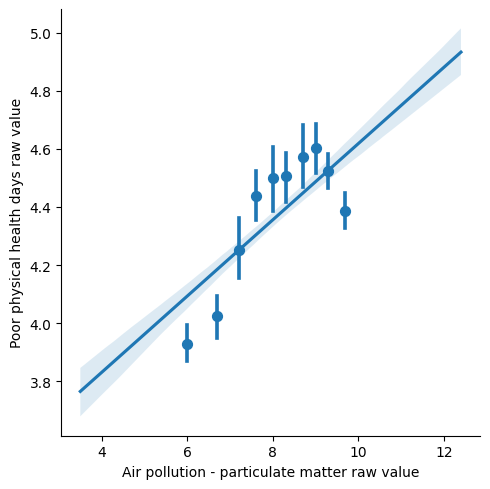

In [ ]:
sns.lmplot(x= 'Air pollution - particulate matter raw value', y="Poor physical health days raw value", data=p2_Float,x_bins=10, x_estimator=np.mean)

In [ ]:
X =p2_Float[['Drinking water violations raw value']]
y = p2_Float['Poor physical health days raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

4.388585543371592


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Drinking water violations raw value,-0.079529


Calculate and print out error metrics for the model generated above

In [ ]:
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE: 0.604426601390274
MSE: 0.5560757017236614
RMSE: 0.7457048355238561
R2:  -0.004544364268877832


A model for the variables in generated below, values are binned for viewing convenience

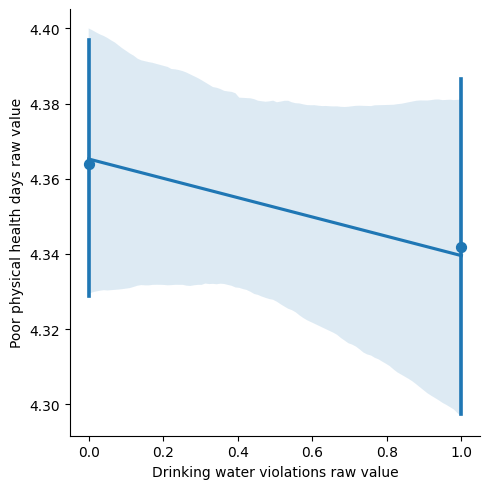

In [ ]:
sns.lmplot(x= 'Drinking water violations raw value', y="Poor physical health days raw value", data=p2_Float,x_bins=10, x_estimator=np.mean)

In [ ]:
X =p2_Float[['Severe housing problems raw value']]
y = p2_Float['Poor physical health days raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

3.7054472688236215


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Severe housing problems raw value,5.071633


Calculate and print out error metrics for the model generated above

In [ ]:
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE: 0.589673936287489
MSE: 0.5292388428629384
RMSE: 0.7274880362335442
R2:  0.043936112831010954


A model for the variables in generated below, values are binned for viewing convenience

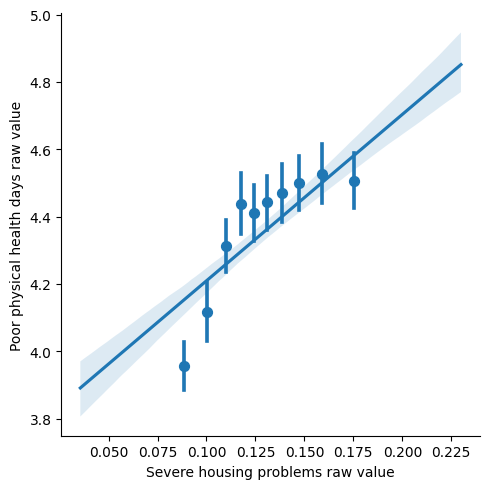

In [ ]:
sns.lmplot(x= 'Severe housing problems raw value', y="Poor physical health days raw value", data=p2_Float,x_bins=10, x_estimator=np.mean)

In [ ]:
X =p2_Float[['Driving alone to work raw value']]
y = p2_Float['Poor physical health days raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

1.020261310996255


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Driving alone to work raw value,4.150342


Calculate and print out error metrics for the model generated above

In [ ]:
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE: 0.5600805908234977
MSE: 0.4882239647540644
RMSE: 0.6987302517810893
R2:  0.11802901875682881


A model for the variables in generated below, values are binned for viewing convenience

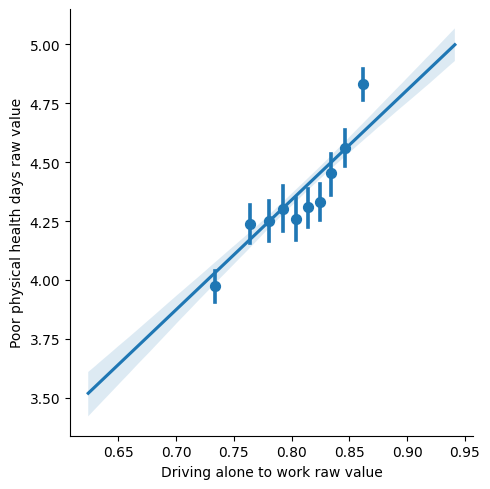

In [ ]:
sns.lmplot(x= 'Driving alone to work raw value', y="Poor physical health days raw value", data=p2_Float,x_bins=10, x_estimator=np.mean)

In [ ]:
X =p2_Float[['Long commute - driving alone raw value']]
y = p2_Float['Poor physical health days raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

3.9361761628535192


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Long commute - driving alone raw value,1.28843


Calculate and print out error metrics for the model generated above

In [ ]:
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE: 0.5924003438698736
MSE: 0.5361002159406586
RMSE: 0.7321886477818804
R2:  0.03154112122284458


A model for the variables in generated below, values are binned for viewing convenience

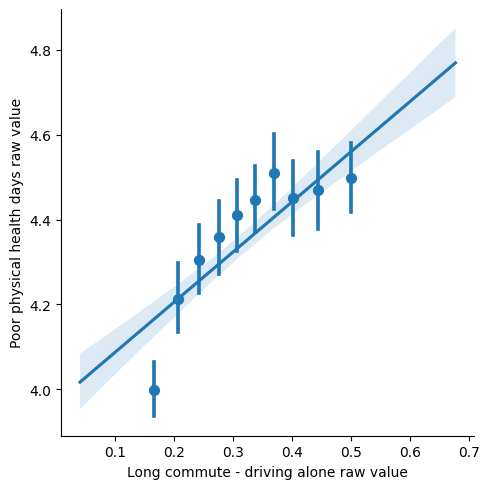

In [ ]:
sns.lmplot(x= 'Long commute - driving alone raw value', y="Poor physical health days raw value", data=p2_Float,x_bins=10, x_estimator=np.mean)

# Poor or fair health raw value

A test/train split of 50/50 was used for all of our models. Preventing overfit and ensuring accurate models. Model will go ahead and be trained then analyzed further down.

In [ ]:
X =p2_Float[['Air pollution - particulate matter raw value','Drinking water violations raw value','Severe housing problems raw value','Driving alone to work raw value','Long commute - driving alone raw value']]
y = p2_Float['Poor or fair health raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm_PoFH = LinearRegression()
lm_PoFH.fit(X_train,y_train)
print(lm_PoFH.intercept_)

-0.14733888025153044


In [ ]:
coeff_df = pd.DataFrame(lm_PoFH.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Air pollution - particulate matter raw value,0.003186
Drinking water violations raw value,-0.004936
Severe housing problems raw value,0.509293
Driving alone to work raw value,0.316061
Long commute - driving alone raw value,0.030750


Calculate and print out error metrics for the model generated above

In [ ]:
predictions_PoFH = lm_PoFH.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions_PoFH))
print('MSE:', metrics.mean_squared_error(y_test, predictions_PoFH))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_PoFH)))
print('R2: ', metrics.r2_score(y_test, predictions_PoFH))

MAE: 0.03378082265705838
MSE: 0.0018081540590483502
RMSE: 0.042522394794371005
R2:  0.26188289582530255


Model using all of the determinants and the resulting predicted y values

[]

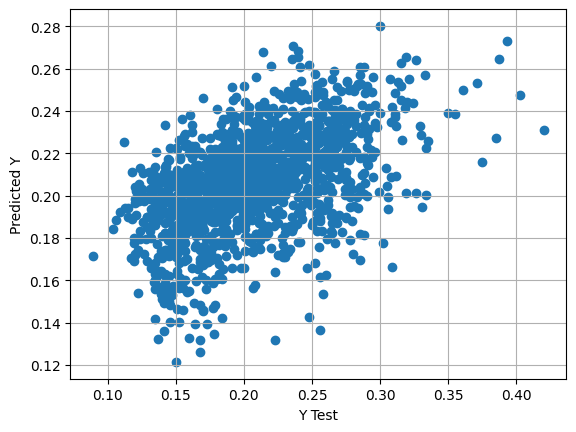

In [ ]:
plt.scatter(y_test,predictions_PoFH)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.grid()
plt.plot()

In [ ]:
X =p2_Float[['Air pollution - particulate matter raw value']]
y = p2_Float['Poor or fair health raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

0.14299149102738484


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Air pollution - particulate matter raw value,0.007928


Calculate and print out error metrics for the model generated above

In [ ]:
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE: 0.037970480595655685
MSE: 0.0022199736413549926
RMSE: 0.04711659624118653
R2:  0.09377162454646282


A model for the variables in generated below, values are binned for viewing convenience

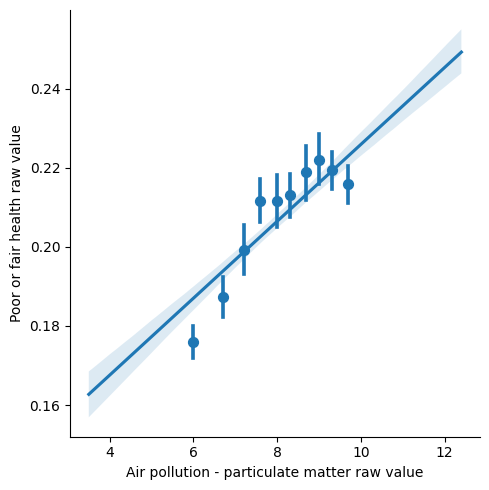

In [ ]:
sns.lmplot(x= 'Air pollution - particulate matter raw value', y="Poor or fair health raw value", data=p2_Float,x_bins=10, x_estimator=np.mean)

In [ ]:
X =p2_Float[['Drinking water violations raw value']]
y = p2_Float['Poor or fair health raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

0.20745414865497228


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Drinking water violations raw value,-0.002377


Calculate and print out error metrics for the model generated above

In [ ]:
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE: 0.04048315015962736
MSE: 0.002454682041308089
RMSE: 0.049544747868044386
R2:  -0.0020400589945046566


A model for the variables in generated below, values are binned for viewing convenience

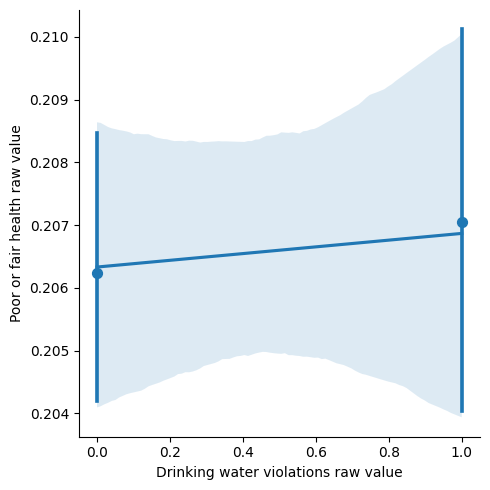

In [ ]:
sns.lmplot(x= 'Drinking water violations raw value', y="Poor or fair health raw value", data=p2_Float,x_bins=10, x_estimator=np.mean)

In [ ]:
X =p2_Float[['Severe housing problems raw value']]
y = p2_Float['Poor or fair health raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

0.15301591834499392


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Severe housing problems raw value,0.415223


Calculate and print out error metrics for the model generated above

In [ ]:
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE: 0.038549360274051175
MSE: 0.0022589819231769864
RMSE: 0.047528748386392275
R2:  0.07784782653091404


A model for the variables in generated below, values are binned for viewing convenience

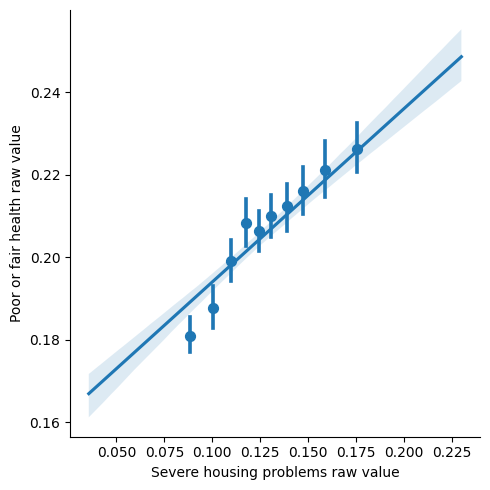

In [ ]:
sns.lmplot(x= 'Severe housing problems raw value', y="Poor or fair health raw value", data=p2_Float,x_bins=10, x_estimator=np.mean)

In [ ]:
X =p2_Float[['Driving alone to work raw value']]
y = p2_Float['Poor or fair health raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

-0.019333019552374958


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Driving alone to work raw value,0.280775


Calculate and print out error metrics for the model generated above

In [ ]:
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE: 0.03708780756781406
MSE: 0.0021397141966105152
RMSE: 0.04625704483222545
R2:  0.12653480014038432


A model for the variables in generated below, values are binned for viewing convenience

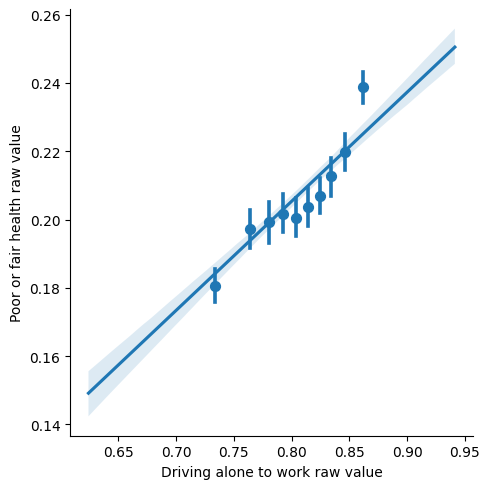

In [ ]:
sns.lmplot(x= 'Driving alone to work raw value', y="Poor or fair health raw value", data=p2_Float,x_bins=10, x_estimator=np.mean)

In [ ]:
X =p2_Float[['Long commute - driving alone raw value']]
y = p2_Float['Poor or fair health raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

0.18721839607148355


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Long commute - driving alone raw value,0.058925


Calculate and print out error metrics for the model generated above

In [ ]:
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE: 0.03969356188414809
MSE: 0.00240615730234635
RMSE: 0.04905259730479468
R2:  0.017768507440438897


A model for the variables in generated below, values are binned for viewing convenience

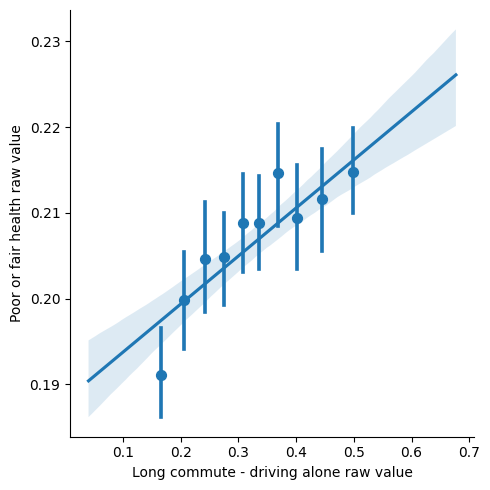

In [ ]:
sns.lmplot(x= 'Long commute - driving alone raw value', y="Poor or fair health raw value", data=p2_Float,x_bins=10, x_estimator=np.mean)

# Low birthweight raw value

A test/train split of 50/50 was used for all of our models. Preventing overfit and ensuring accurate models. Model will go ahead and be trained then analyzed further down.

In [ ]:
X =p2_Float[['Air pollution - particulate matter raw value','Drinking water violations raw value','Severe housing problems raw value','Driving alone to work raw value','Long commute - driving alone raw value']]
y = p2_Float['Low birthweight raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm_LB = LinearRegression()
lm_LB.fit(X_train,y_train)
print(lm_LB.intercept_)

-0.06128919017879941


In [ ]:
coeff_df = pd.DataFrame(lm_LB.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Air pollution - particulate matter raw value,0.000215
Drinking water violations raw value,-0.001546
Severe housing problems raw value,0.229872
Driving alone to work raw value,0.132832
Long commute - driving alone raw value,0.016039


Calculate and print out error metrics for the model generated above

In [ ]:
predictions_LB = lm_LB.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions_LB))
print('MSE:', metrics.mean_squared_error(y_test, predictions_LB))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_LB)))
print('R2: ', metrics.r2_score(y_test, predictions_LB))

MAE: 0.013597101318494067
MSE: 0.00033535233773619337
RMSE: 0.018312627821702523
R2:  0.23542373866744526


Model using all of the determinants and the resulting predicted y values

[]

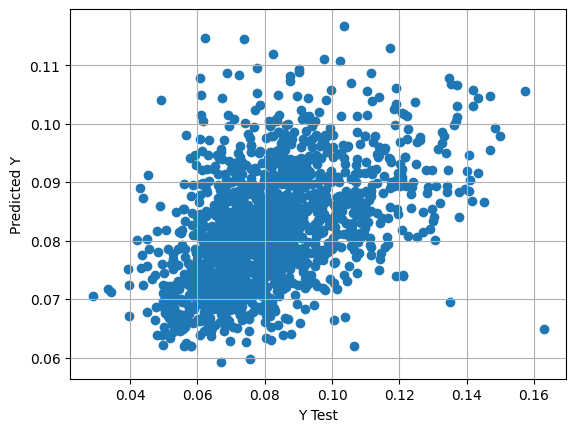

In [ ]:
plt.scatter(y_test,predictions_LB)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.grid()
plt.plot()

In [ ]:
X =p2_Float[['Air pollution - particulate matter raw value']]
y = p2_Float['Low birthweight raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

0.06311540041188886


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Air pollution - particulate matter raw value,0.002317


Calculate and print out error metrics for the model generated above

In [ ]:
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE: 0.015205105777448578
MSE: 0.0004261305976108239
RMSE: 0.02064293093557269
R2:  0.02845663352139627


A model for the variables in generated below, values are binned for viewing convenience

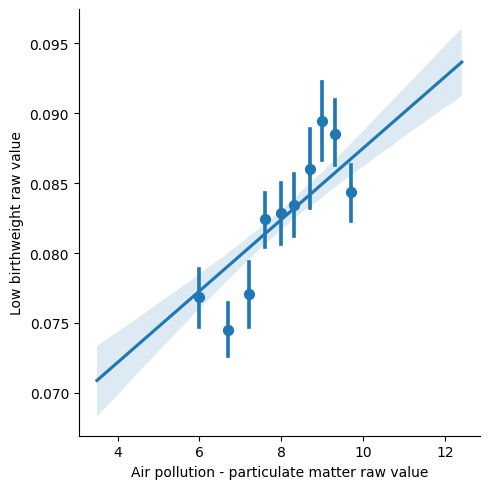

In [ ]:
sns.lmplot(x= 'Air pollution - particulate matter raw value', y="Low birthweight raw value", data=p2_Float,x_bins=10, x_estimator=np.mean)

In [ ]:
X =p2_Float[['Drinking water violations raw value']]
y = p2_Float['Low birthweight raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

0.08192372304634901


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Drinking water violations raw value,-0.000608


Calculate and print out error metrics for the model generated above

In [ ]:
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE: 0.01545584801433361
MSE: 0.0004405978914649913
RMSE: 0.02099042380384425
R2:  -0.004527628706470388


A model for the variables in generated below, values are binned for viewing convenience

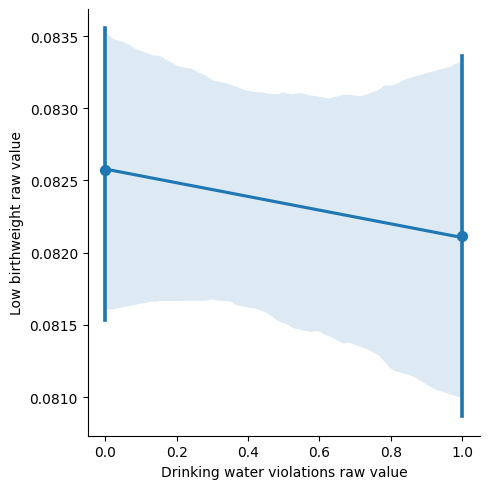

In [ ]:
sns.lmplot(x= 'Drinking water violations raw value', y="Low birthweight raw value", data=p2_Float,x_bins=10, x_estimator=np.mean)

In [ ]:
X =p2_Float[['Severe housing problems raw value']]
y = p2_Float['Low birthweight raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

0.057489070875722616


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Severe housing problems raw value,0.187656


Calculate and print out error metrics for the model generated above

In [ ]:
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE: 0.01487379835357246
MSE: 0.0003968879596283018
RMSE: 0.019922047074241687
R2:  0.09512748773731738


A model for the variables in generated below, values are binned for viewing convenience

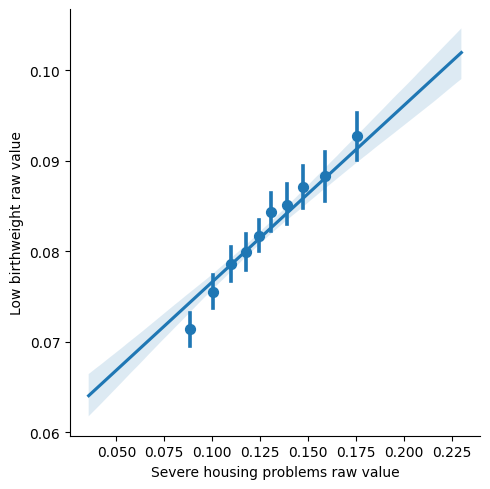

In [ ]:
sns.lmplot(x= 'Severe housing problems raw value', y="Low birthweight raw value", data=p2_Float,x_bins=10, x_estimator=np.mean)

In [ ]:
X =p2_Float[['Driving alone to work raw value']]
y = p2_Float['Low birthweight raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

-0.004105839168862854


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Driving alone to work raw value,0.106641


Calculate and print out error metrics for the model generated above

In [ ]:
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE: 0.014761752810332308
MSE: 0.00040267087851045003
RMSE: 0.020066660870968294
R2:  0.08194289946711264


A model for the variables in generated below, values are binned for viewing convenience

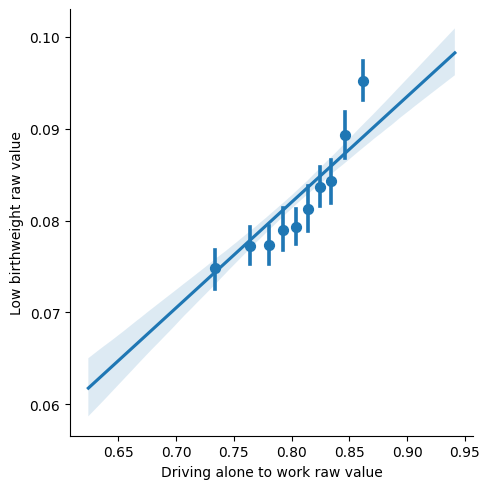

In [ ]:
sns.lmplot(x= 'Driving alone to work raw value', y="Low birthweight raw value", data=p2_Float,x_bins=10, x_estimator=np.mean)

In [ ]:
X =p2_Float[['Long commute - driving alone raw value']]
y = p2_Float['Low birthweight raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

0.07356004414918697


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Long commute - driving alone raw value,0.024765


Calculate and print out error metrics for the model generated above

In [ ]:
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE: 0.015121855127788282
MSE: 0.00042478226483135613
RMSE: 0.02061024659802391
R2:  0.03153072342491903


A model for the variables in generated below, values are binned for viewing convenience

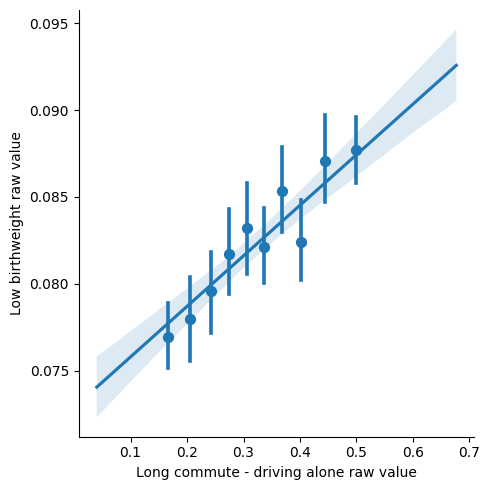

In [ ]:
sns.lmplot(x= 'Long commute - driving alone raw value', y="Low birthweight raw value", data=p2_Float,x_bins=10, x_estimator=np.mean)

# Poor mental health days raw value

A test/train split of 50/50 was used for all of our models. Preventing overfit and ensuring accurate models. Model will go ahead and be trained then analyzed further down.

In [ ]:
X =p2_Float[['Air pollution - particulate matter raw value','Drinking water violations raw value','Severe housing problems raw value','Driving alone to work raw value','Long commute - driving alone raw value']]
y = p2_Float['Poor mental health days raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm_PMHD = LinearRegression()
lm_PMHD.fit(X_train,y_train)
print(lm_PMHD.intercept_)

-0.19220631534121857


In [ ]:
coeff_df = pd.DataFrame(lm_PMHD.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Air pollution - particulate matter raw value,0.058967
Drinking water violations raw value,-0.088650
Severe housing problems raw value,3.826334
Driving alone to work raw value,4.682038
Long commute - driving alone raw value,1.260936


Calculate and print out error metrics for the model generated above

In [ ]:
predictions_PMHD = lm_PMHD.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions_PMHD))
print('MSE:', metrics.mean_squared_error(y_test, predictions_PMHD))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_PMHD)))
print('R2: ', metrics.r2_score(y_test, predictions_PMHD))

MAE: 0.48267282360401004
MSE: 0.3598783343343648
RMSE: 0.5998986033775748
R2:  0.24837058871665452


Model using all of the determinants and the resulting predicted y values

[]

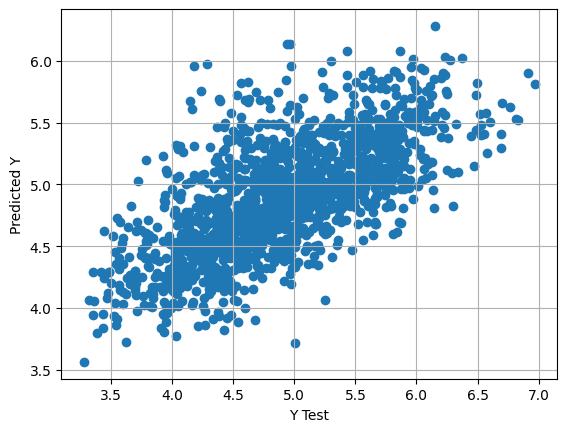

In [ ]:
plt.scatter(y_test,predictions_PMHD)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.grid()
plt.plot()

In [ ]:
X =p2_Float[['Air pollution - particulate matter raw value']]
y = p2_Float['Poor mental health days raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

3.8043835554718424


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Air pollution - particulate matter raw value,0.139657


Calculate and print out error metrics for the model generated above

In [ ]:
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE: 0.5301858970419987
MSE: 0.43086829862263426
RMSE: 0.6564055900300014
R2:  0.10010341068908712


A model for the variables in generated below, values are binned for viewing convenience

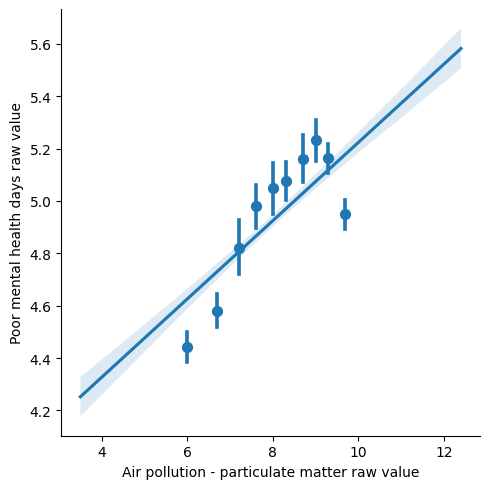

In [ ]:
sns.lmplot(x= 'Air pollution - particulate matter raw value', y="Poor mental health days raw value", data=p2_Float,x_bins=10, x_estimator=np.mean)

In [ ]:
X =p2_Float[['Drinking water violations raw value']]
y = p2_Float['Poor mental health days raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

4.951893870379571


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Drinking water violations raw value,-0.075155


Calculate and print out error metrics for the model generated above

In [ ]:
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE: 0.5661650745274752
MSE: 0.47954026170382696
RMSE: 0.6924884560076269
R2:  -0.0015511638336791478


A model for the variables in generated below, values are binned for viewing convenience

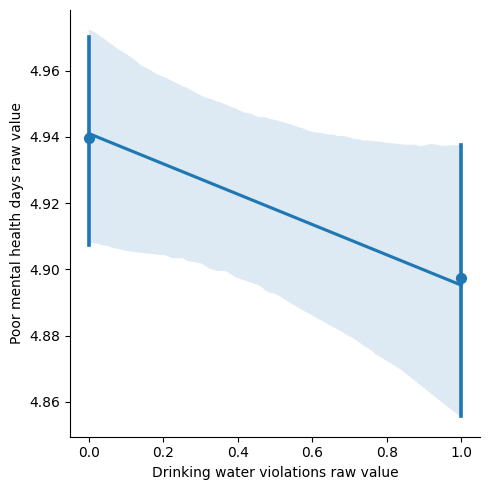

In [ ]:
sns.lmplot(x= 'Drinking water violations raw value', y="Poor mental health days raw value", data=p2_Float,x_bins=10, x_estimator=np.mean)

In [ ]:
X =p2_Float[['Severe housing problems raw value']]
y = p2_Float['Poor mental health days raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

4.600529739886624


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Severe housing problems raw value,2.512786


Calculate and print out error metrics for the model generated above

In [ ]:
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE: 0.5668871032427628
MSE: 0.4739991555072261
RMSE: 0.6884759658166915
R2:  0.01002179844567841


A model for the variables in generated below, values are binned for viewing convenience

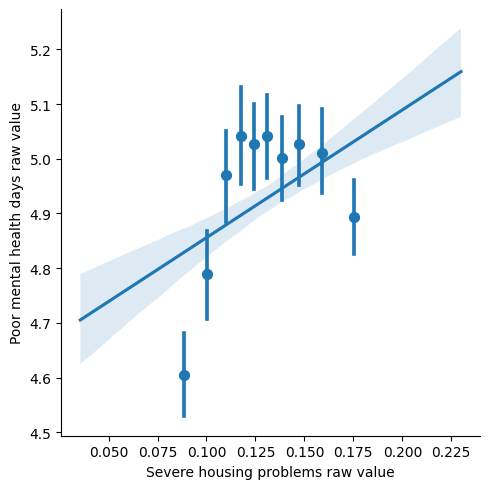

In [ ]:
sns.lmplot(x= 'Severe housing problems raw value', y="Poor mental health days raw value", data=p2_Float,x_bins=10, x_estimator=np.mean)

In [ ]:
X =p2_Float[['Driving alone to work raw value']]
y = p2_Float['Poor mental health days raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

0.8352679575742687


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Driving alone to work raw value,5.082258


Calculate and print out error metrics for the model generated above

In [ ]:
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE: 0.5054108303969729
MSE: 0.39636783826319677
RMSE: 0.6295775077488052
R2:  0.17215987598570381


A model for the variables in generated below, values are binned for viewing convenience

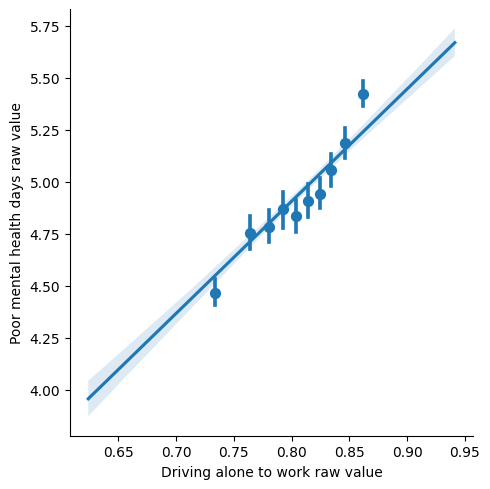

In [ ]:
sns.lmplot(x= 'Driving alone to work raw value', y="Poor mental health days raw value", data=p2_Float,x_bins=10, x_estimator=np.mean)

In [ ]:
X =p2_Float[['Long commute - driving alone raw value']]
y = p2_Float['Poor mental health days raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

4.368455927135875


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Long commute - driving alone raw value,1.691654


Calculate and print out error metrics for the model generated above

In [ ]:
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE: 0.5431315195043335
MSE: 0.4449181712551333
RMSE: 0.6670218671491462
R2:  0.07075933385016409


A model for the variables in generated below, values are binned for viewing convenience

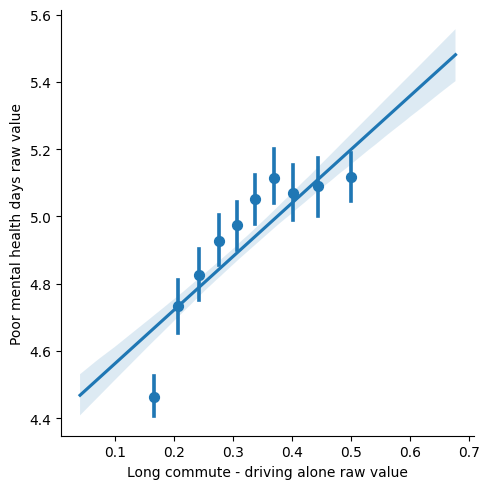

In [ ]:
sns.lmplot(x= 'Long commute - driving alone raw value', y="Poor mental health days raw value", data=p2_Float,x_bins=10, x_estimator=np.mean)

# Premature death raw value

A test/train split of 50/50 was used for all of our models. Preventing overfit and ensuring accurate models. Model will go ahead and be trained then analyzed further down.

In [ ]:
X =p2_Float[['Air pollution - particulate matter raw value','Drinking water violations raw value','Severe housing problems raw value','Driving alone to work raw value','Long commute - driving alone raw value']]
y = p2_Float['Premature death raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm_PD = LinearRegression()
lm_PD.fit(X_train,y_train)
print(lm_PD.intercept_)

-8474.187231591517


In [ ]:
coeff_df = pd.DataFrame(lm_PD.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Air pollution - particulate matter raw value,-9.393906
Drinking water violations raw value,-413.616155
Severe housing problems raw value,20453.010764
Driving alone to work raw value,17855.589795
Long commute - driving alone raw value,1842.360934


Calculate and print out error metrics for the model generated above

In [ ]:
predictions_PD = lm_PD.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions_PD))
print('MSE:', metrics.mean_squared_error(y_test, predictions_PD))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_PD)))
print('R2: ', metrics.r2_score(y_test, predictions_PD))

MAE: 1878.5245825743268
MSE: 6297738.024450317
RMSE: 2509.5294428339184
R2:  0.16088995185013089


Model using all of the determinants and the resulting predicted y values

[]

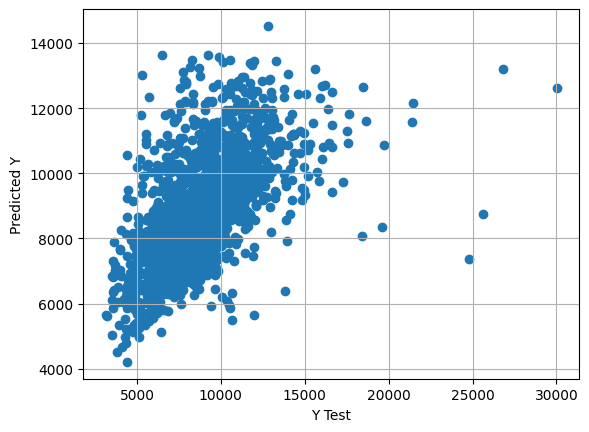

In [ ]:
plt.scatter(y_test,predictions_PD)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.grid()
plt.plot()

In [ ]:
X =p2_Float[['Air pollution - particulate matter raw value']]
y = p2_Float['Premature death raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

6967.424205257776


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Air pollution - particulate matter raw value,242.660571


Calculate and print out error metrics for the model generated above

In [ ]:
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE: 2054.828410483974
MSE: 7305080.450223549
RMSE: 2702.791233192743
R2:  0.026671737609985313


A model for the variables in generated below, values are binned for viewing convenience

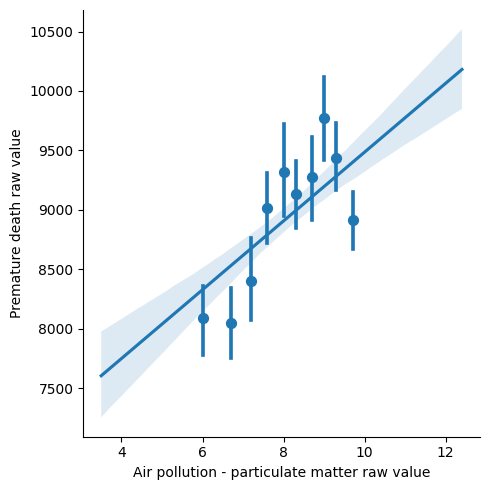

In [ ]:
sns.lmplot(x= 'Air pollution - particulate matter raw value', y="Premature death raw value", data=p2_Float,x_bins=10, x_estimator=np.mean)

In [ ]:
X =p2_Float[['Drinking water violations raw value']]
y = p2_Float['Premature death raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

9043.879676790297


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Drinking water violations raw value,-359.552751


Calculate and print out error metrics for the model generated above

In [ ]:
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE: 2109.0233207729348
MSE: 7529715.3498776555
RMSE: 2744.032680176688
R2:  -0.0032585962230657906


A model for the variables in generated below, values are binned for viewing convenience

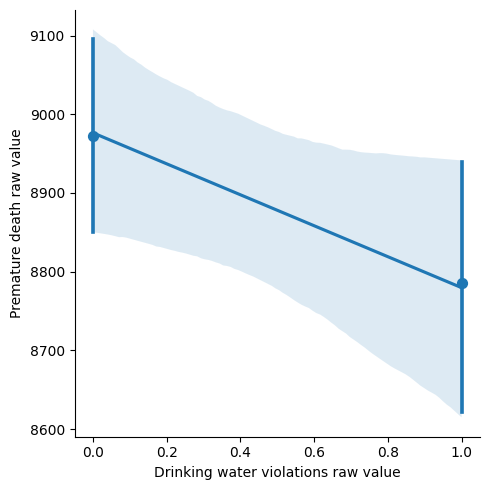

In [ ]:
sns.lmplot(x= 'Drinking water violations raw value', y="Premature death raw value", data=p2_Float,x_bins=10, x_estimator=np.mean)

In [ ]:
X =p2_Float[['Severe housing problems raw value']]
y = p2_Float['Premature death raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

7062.76540076605


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Severe housing problems raw value,14347.43319


Calculate and print out error metrics for the model generated above

In [ ]:
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE: 2065.1961698967148
MSE: 7282265.1047825385
RMSE: 2698.5672318440647
R2:  0.029711652185224202


A model for the variables in generated below, values are binned for viewing convenience

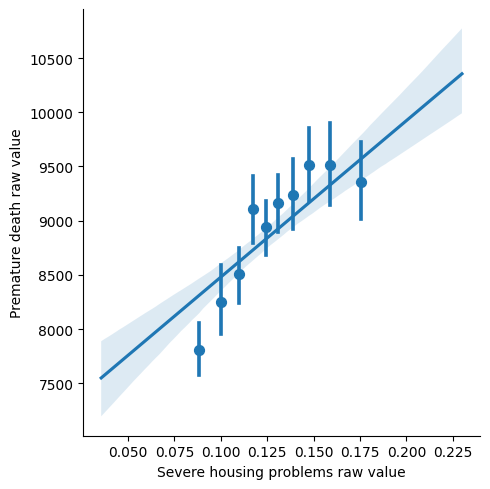

In [ ]:
sns.lmplot(x= 'Severe housing problems raw value', y="Premature death raw value", data=p2_Float,x_bins=10, x_estimator=np.mean)

In [ ]:
X =p2_Float[['Driving alone to work raw value']]
y = p2_Float['Premature death raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

-3568.8171575752403


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Driving alone to work raw value,15513.278574


Calculate and print out error metrics for the model generated above

In [ ]:
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE: 1939.3748224429437
MSE: 6673775.504105167
RMSE: 2583.36515113624
R2:  0.11078675187034481


A model for the variables in generated below, values are binned for viewing convenience

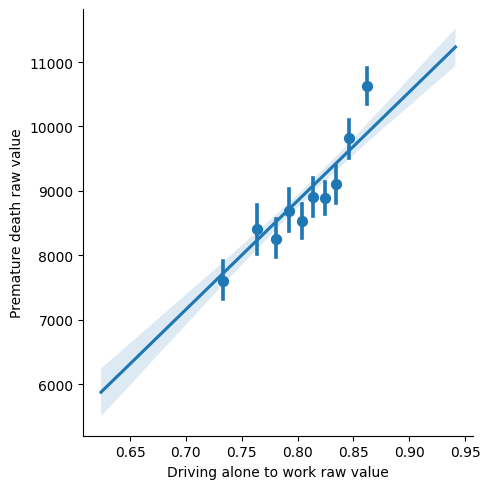

In [ ]:
sns.lmplot(x= 'Driving alone to work raw value', y="Premature death raw value", data=p2_Float,x_bins=10, x_estimator=np.mean)

In [ ]:
X =p2_Float[['Long commute - driving alone raw value']]
y = p2_Float['Premature death raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

7972.9383815949


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Long commute - driving alone raw value,2862.067486


Calculate and print out error metrics for the model generated above

In [ ]:
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE: 2089.8155436025663
MSE: 7420977.948949166
RMSE: 2724.147196637723
R2:  0.011229565300096445


A model for the variables in generated below, values are binned for viewing convenience

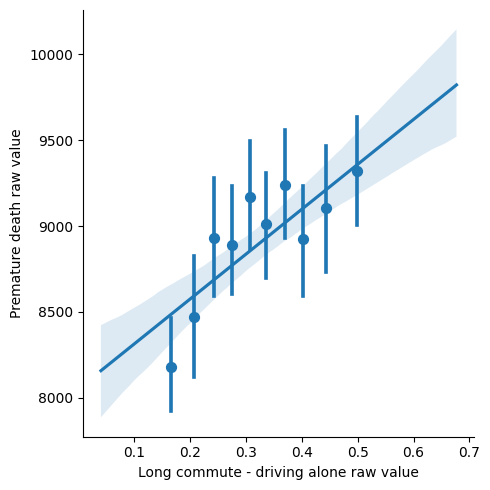

In [ ]:
sns.lmplot(x= 'Long commute - driving alone raw value', y="Premature death raw value", data=p2_Float,x_bins=10, x_estimator=np.mean)